In [17]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def parse_csv(file_path, delimiter):
    csv_file = open(file_path, 'r').read().split('\n')
    csv_header = csv_file[0].split(delimiter)
    csv_data = csv_file[1:]
    
    csv_data = [parse_csv_data_line(row, csv_header, delimiter) for row in csv_data]
    
    return csv_data

In [19]:
def parse_csv_data_line(data_row, csv_header, delimiter):
    columns = data_row.split(delimiter)
    parsed_row = {}
    
    for column_index in range(len(csv_header)):
        if column_index < len(columns): 
            parsed_row[csv_header[column_index]] = columns[column_index]
        
    return parsed_row

In [20]:
parsed_csv = parse_csv('./kc_house_data.csv', ',')

print(parsed_csv[0])

{'id': '"7129300520"', 'date': '"20141013T000000"', 'price': '221900', 'bedrooms': '3', 'bathrooms': '1', 'sqft_living': '1180', 'sqft_lot': '5650', 'floors': '"1"', 'waterfront': '0', 'view': '0', 'condition': '3', 'grade': '7', 'sqft_above': '1180', 'sqft_basement': '0', 'yr_built': '1955', 'yr_renovated': '0', 'zipcode': '"98178"', 'lat': '47.5112', 'long': '-122.257', 'sqft_living15': '1340', 'sqft_lot15': '5650'}


#### Using only two features in order to plot the data

In [21]:
training_data_number = 500
x = []
y = []

for row_index in range(training_data_number):
    row = parsed_csv[row_index]
    
    try:
        y.append([int(row['price'])])
        x.append([int(row['bedrooms']), int(row['sqft_living'])])
    except: None
        
x = np.array(x)
y = np.array(y)

In [22]:
def calculate_avg(data):
    return np.sum(data) / len(data)

def calculate_range(data):
    return np.amax(data) - np.amin(data)

def normalize_data(data):
    all_sets = []
    
    for data_set_index in range(len(data[0])):
            current_set = data[:, data_set_index]
            
            all_sets.append((current_set - calculate_avg(current_set)) / calculate_range(current_set))
    
    return np.array(list(zip(*all_sets)))

In [23]:
normalized_data = normalize_data(x)
y = normalize_data(y)

normalized_data[0]

array([-0.06180258, -0.17634217])

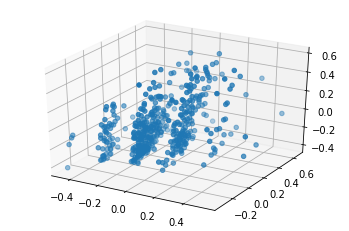

In [24]:
ax = plt.axes(projection='3d')

ax.scatter3D(normalized_data[:, 0], normalized_data[:, 1], y)

In [25]:
theta = np.ones(len(normalized_data[0]))

def h(inputs):
    return np.dot(np.transpose(inputs), theta)

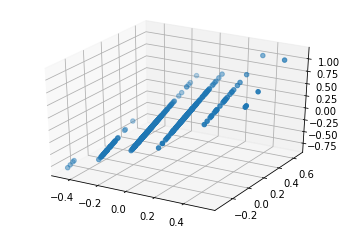

In [26]:
plt.axes(projection='3d').scatter(normalized_data[:, 0], normalized_data[:, 1], [h(input_data) for input_data in normalized_data])

In [27]:
def cost_function(inputs, outputs):
    return (1 / (2 * len(inputs))) * np.sum(np.square(np.array([h(input_data) for input_data in inputs]) - outputs))

In [28]:
cost_function(normalized_data, y)

30.67090383949806

In [29]:
def gradient_decent(inputs, outputs, learning_rate=0.0001, epochs = 10000):
    global theta
    
    costs = []
    
    for epoch in range(epochs):
        new_thetas = []
            
        for theta_index in range(len(theta)):
            inputs_for_theta = inputs[:, theta_index]
            inside_sum = (np.array([h(input_data) for input_data in inputs]) - outputs) * inputs_for_theta

            new_thetas.append(theta[theta_index] - learning_rate * (1 / len(inputs)) * np.sum(inside_sum))
        
        theta = np.array(new_thetas)
        costs.append(cost_function(inputs, outputs))
        
    return epochs, costs

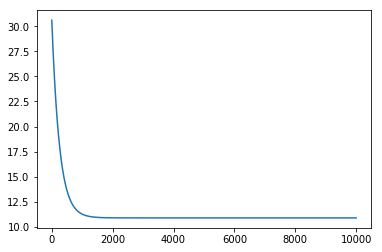

In [30]:
epochs, costs = gradient_decent(normalized_data, y)

plt.plot(list(range(epochs)), costs)

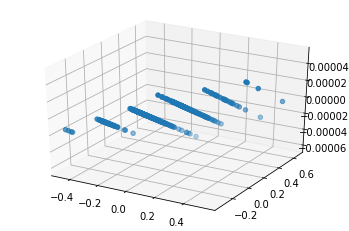

In [31]:
plt.axes(projection='3d').scatter(normalized_data[:, 0], normalized_data[:, 1], [h(input_data) for input_data in normalized_data])